<a href="https://colab.research.google.com/github/pdomins/imputation-methods/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Inputation methods

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset:** thyroidDF.csv - 9172 observations x 31 attributes

**Atributes:**
- age - age of the patient (int)
- sex - sex patient identifies (str)
- on_thyroxine - whether patient is on thyroxine (bool)
- query on thyroxine - *whether patient is on thyroxine (bool)
- on antithyroid meds - whether patient is on antithyroid meds (bool)
- sick - whether patient is sick (bool)
- pregnant - whether patient is pregnant (bool)
- thyroid_surgery - whether patient has undergone thyroid surgery (bool)
- I131_treatment - whether patient is undergoing I131 treatment (bool)
- query_hypothyroid - whether patient believes they have hypothyroid (bool)
- query_hyperthyroid - whether patient believes they have hyperthyroid (bool)
- lithium - whether patient * lithium (bool)
- goitre - whether patient has goitre (bool)
- tumor - whether patient has tumor (bool)
- hypopituitary - whether patient * hyperpituitary gland (float)
- psych - whether patient * psych (bool)
- TSH_measured - whether TSH was measured in the blood (bool)
- TSH - TSH level in blood from lab work (float)
- T3_measured - whether T3 was measured in the blood (bool)
- T3 - T3 level in blood from lab work (float)
- TT4_measured - whether TT4 was measured in the blood (bool)
- TT4 - TT4 level in blood from lab work (float)
- T4U_measured - whether T4U was measured in the blood (bool)
- T4U - T4U level in blood from lab work (float)
- FTI_measured - whether FTI was measured in the blood (bool)
- FTI - FTI level in blood from lab work (float)
- TBG_measured - whether TBG was measured in the blood (bool)
- TBG - TBG level in blood from lab work (float)
- referral_source - (str)
- target - hyperthyroidism medical diagnosis (str)
- patient_id - unique id of the patient (str)





In [2]:
df = pd.read_csv("thyroidDF.csv")
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [3]:
nan_count_per_column = df.isnull().sum()
nan_count_nonzero = nan_count_per_column[nan_count_per_column != 0]


print("Number of NaN values per column:")
print(nan_count_nonzero)

Number of NaN values per column:
sex     307
TSH     842
T3     2604
TT4     442
T4U     809
FTI     802
TBG    8823
dtype: int64


In [4]:
two_colors = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=2)
two_colors_inverted = two_colors[::-1]
first_color = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=1)[0]
diagnosis_colors = sns.cubehelix_palette(rot=.2, gamma=.5, n_colors=len(df['target'].unique()))

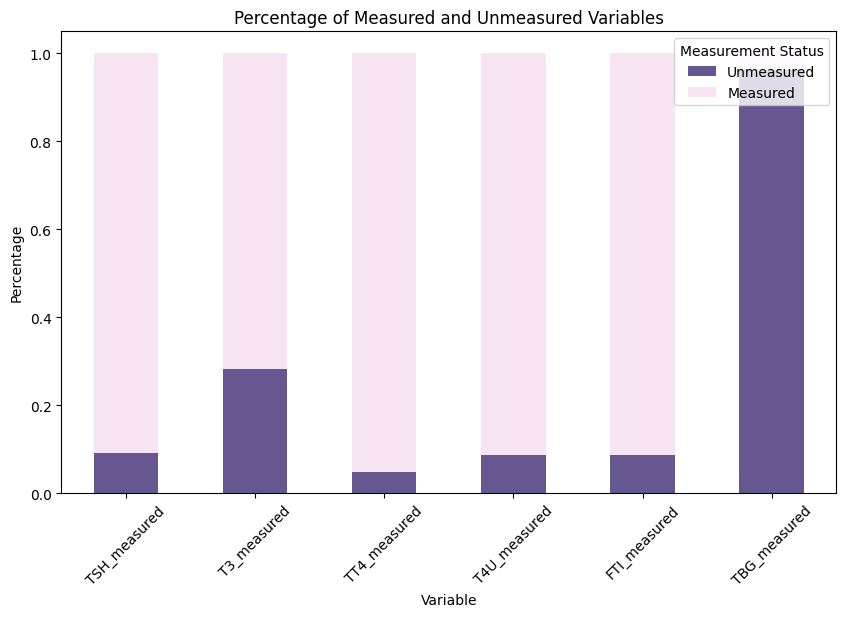

,Unmeasured,Measured
TSH_measured,0.091801,0.908199
T3_measured,0.283908,0.716092
TT4_measured,0.048190,0.951810
T4U_measured,0.088203,0.911797
FTI_measured,0.087440,0.912560
TBG_measured,0.961949,0.038051


In [5]:
columns_to_plot = ['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

measured_counts = df[columns_to_plot].apply(lambda col: col.value_counts(normalize=True)).T
measured_counts.columns = ['Unmeasured', 'Measured']

measured_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=two_colors_inverted)
plt.title('Percentage of Measured and Unmeasured Variables')
plt.xlabel('Variable')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Measurement Status', loc='upper right')
plt.show()
print("\n")
measured_counts

In [6]:
ages_greater_than_100 = df[df['age'] > 100]

if not ages_greater_than_100.empty:
    print("Values of 'age' greater than 100 found:")
    print(ages_greater_than_100)
else:
    print("No values of 'age' greater than 100 found.")

total_ages = len(df['age'])
ages_count_greater_than_100 = len(ages_greater_than_100)

print(f"Total number of ages: {total_ages}")
print(f"Number of ages greater than 100: {ages_count_greater_than_100}")

df = df[df['age'] <= 100]

Values of 'age' greater than 100 found:
        age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
2976    455   F            f                  f                   f    f   
5710  65511   M            f                  f                   f    f   
6392  65512   M            f                  f                   f    f   
8105  65526   F            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
2976        f               f              f                 f  ...  118.0   
5710        f               f              f                 f  ...  113.0   
6392        f               f              f                 f  ...  112.0   
8105        f               f              f                 f  ...  132.0   

     T4U_measured   T4U FTI_measured    FTI TBG_measured TBG  referral_source  \
2976            t  1.13            t  104.0            f NaN              SVI   
5710            t  1.08   

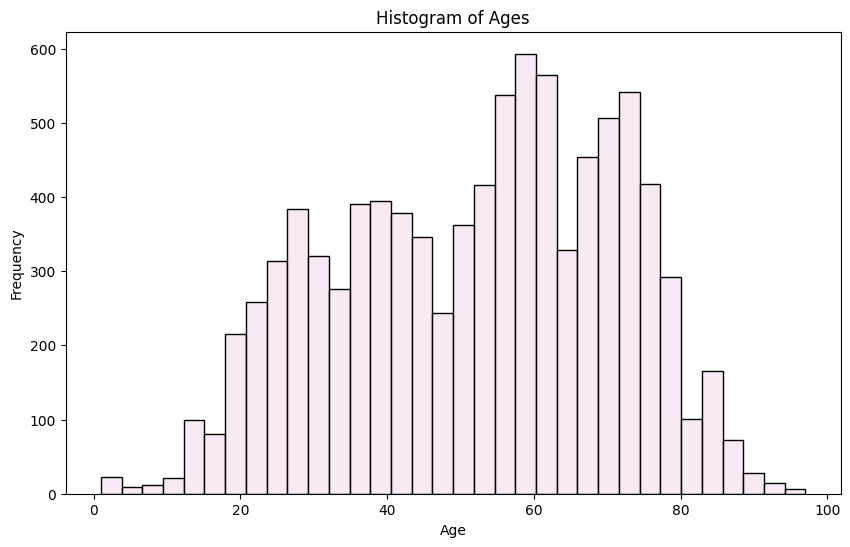

In [7]:
age_data = df['age']

plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins='auto', color=first_color)
plt.title('Histogram of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [8]:
# sex_counts = df['sex'].value_counts()

# plt.figure(figsize=(8, 6))
# sex_counts.plot(kind='bar', color=first_color)
# plt.title('Sex Distribution')
# plt.xlabel('Sex')
# plt.ylabel('Count')

# for index, value in enumerate(sex_counts):
#     plt.text(index, value, str(value), ha='center', va='bottom')

# plt.xticks(rotation=0)

# plt.show()

Normal TSH levels are generally in the range of 0.4 to 4.0 mIU/L. A higher value of TSH can be indicative of **hypothyroidism**, while a lower value can indicate **hyperthyroidism**.

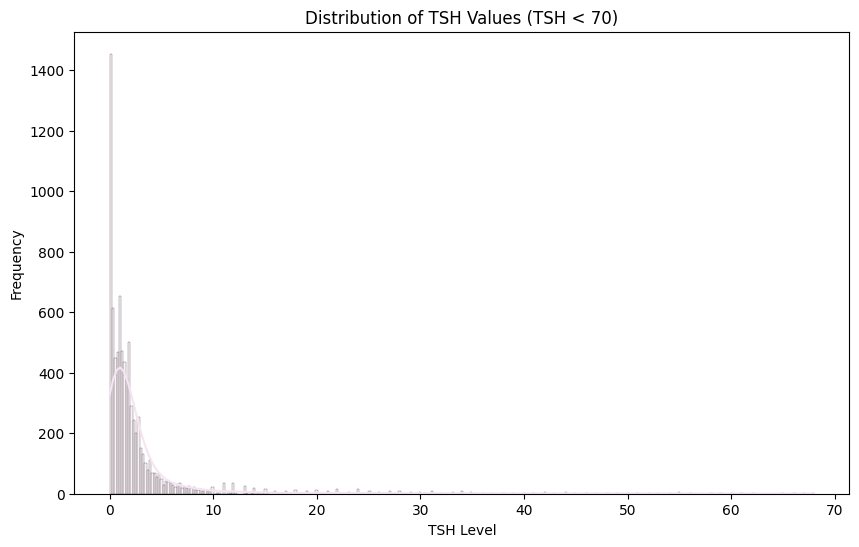

In [9]:
filtered_df = df[df['TSH'] < 70]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['TSH'].dropna(), bins='auto', color=first_color, kde=True)
plt.title('Distribution of TSH Values (TSH < 70)')
plt.xlabel('TSH Level')
plt.ylabel('Frequency')
plt.show()

In [10]:
tsh_stats = df['TSH'].describe()
tsh_stats

count    8326.000000
mean        5.220548
std        24.189614
min         0.005000
25%         0.462500
50%         1.400000
75%         2.700000
max       530.000000
Name: TSH, dtype: float64

<ipython-input-11-fcd9af2ac7be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TSH_Category'] = pd.cut(df['TSH'], bins=bins, labels=labels, include_lowest=True)


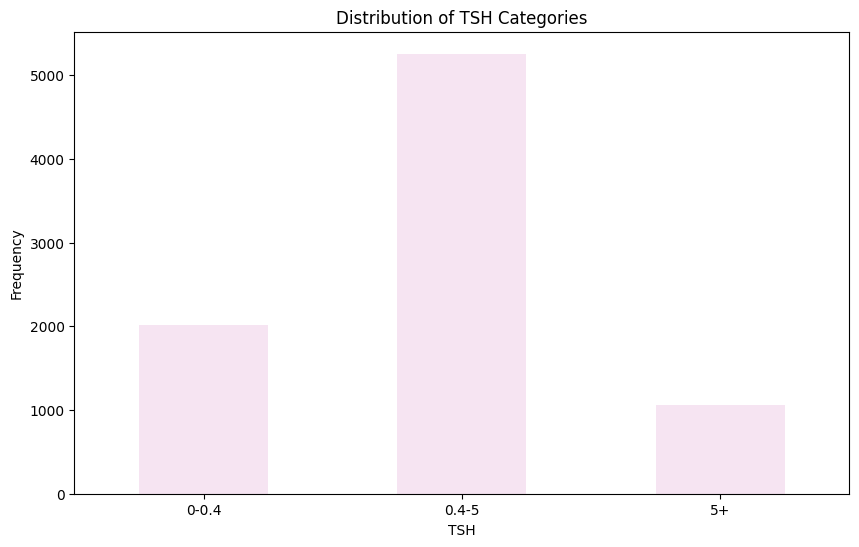

In [11]:
bins = [0, 0.4, 5, df['TSH'].max()]
labels = ['0-0.4', '0.4-5', '5+']
df['TSH_Category'] = pd.cut(df['TSH'], bins=bins, labels=labels, include_lowest=True)

category_counts = df['TSH_Category'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
category_counts.sort_index().plot(kind='bar', color=first_color)
plt.title('Distribution of TSH Categories')
plt.xlabel('TSH')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Normal range of values for T3 is 1.2 to 3.1 nanomoles per liter (nmol/L). A low value of T3 can be indicative of **hypothyroidism**, while a higher value can indicate **hyperthyroidism**

<ipython-input-12-204ac182f87c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T3_Category'] = pd.cut(df['T3'], bins=bins, labels=labels, include_lowest=True)


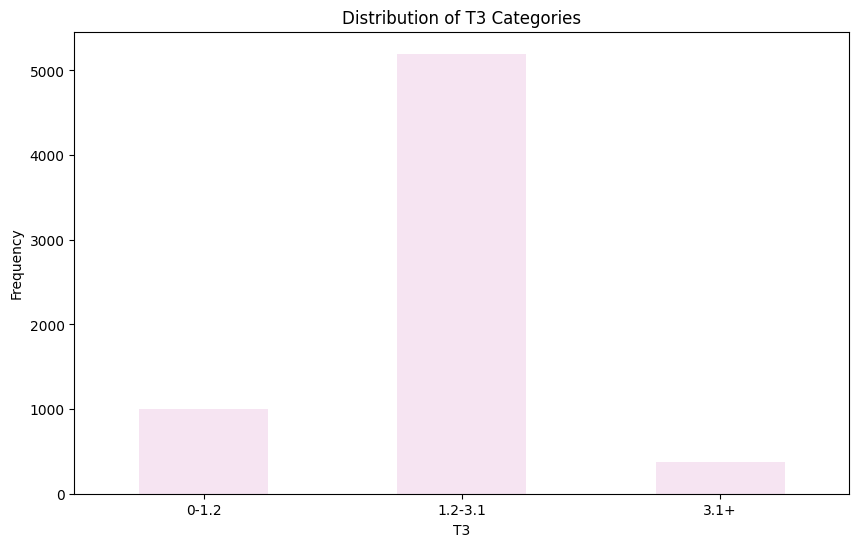

In [12]:
bins = [0, 1.2, 3.1, df['T3'].max()]
labels = ['0-1.2', '1.2-3.1', '3.1+']
df['T3_Category'] = pd.cut(df['T3'], bins=bins, labels=labels, include_lowest=True)

category_counts = df['T3_Category'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
category_counts.sort_index().plot(kind='bar', color=first_color)
plt.title('Distribution of T3 Categories')
plt.xlabel('T3')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Normal range of values for TT4 is 58 to 154 nanomoles per liter (nmol/L). Higher levels of TT4 are typically associated with hyperthyroidism, while lower levels are associated with hypothyroidism.

<ipython-input-13-ae764e7f9e06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TT4_Category'] = pd.cut(df['TT4'], bins=bins, labels=labels, include_lowest=True)


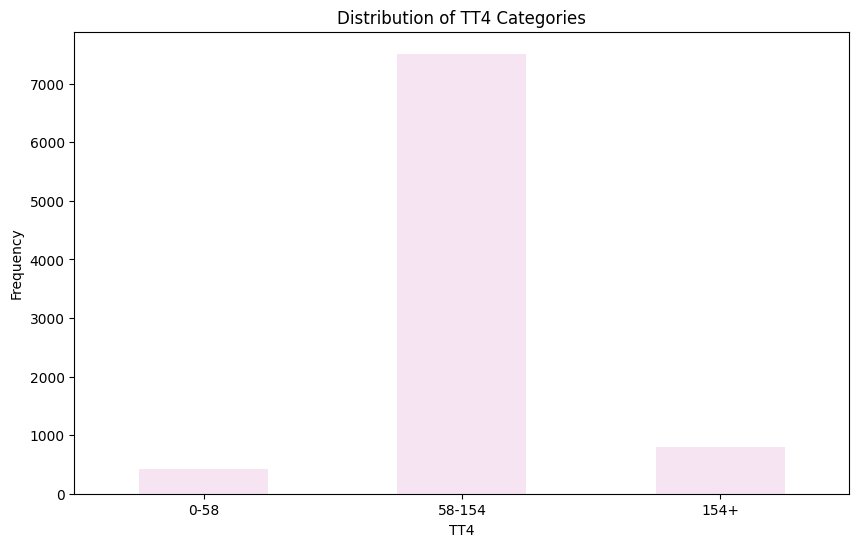

In [13]:
bins = [0, 58, 154, df['TT4'].max()]
labels = ['0-58', '58-154', '154+']
df['TT4_Category'] = pd.cut(df['TT4'], bins=bins, labels=labels, include_lowest=True)

category_counts = df['TT4_Category'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
category_counts.sort_index().plot(kind='bar', color=first_color)
plt.title('Distribution of TT4 Categories')
plt.xlabel('TT4')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

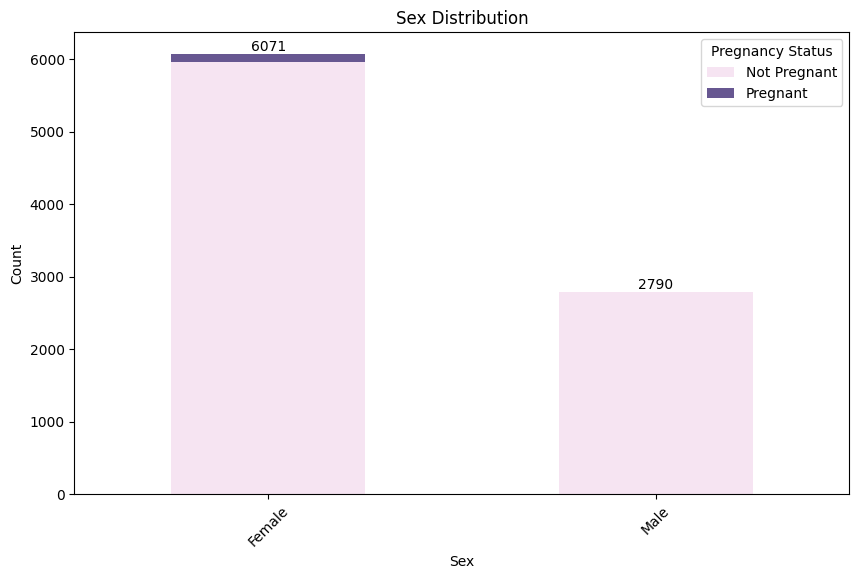

,Not Pregnant,Pregnant
Female,5968.0,103.0
Male,2790.0,NaN


In [14]:
males = df[df['sex'] == 'M']['pregnant']
females = df[df['sex'] == 'F']['pregnant']
combined_df = pd.DataFrame({'Male': males, 'Female': females})
sex_counts = df['sex'].value_counts()
columns_to_plot = ['Female', 'Male']
measured_counts = combined_df[columns_to_plot].apply(lambda col: col.value_counts()).T
measured_counts.columns = ['Not Pregnant', 'Pregnant']

measured_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=two_colors)
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Pregnancy Status', loc='upper right')
for index, value in enumerate(sex_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()
print("\n")
measured_counts

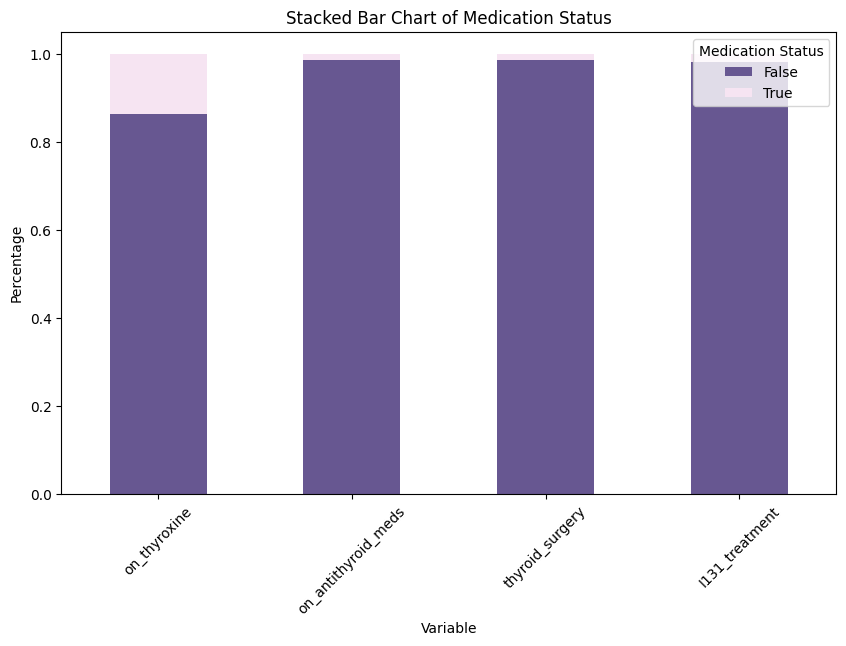

,False,True
on_thyroxine,0.864747,0.135253
on_antithyroid_meds,0.987347,0.012653
thyroid_surgery,0.985384,0.014616
I131_treatment,0.981566,0.018434


In [15]:
columns_to_plot = ['on_thyroxine', 'on_antithyroid_meds', 'thyroid_surgery', 'I131_treatment']

measured_counts = df[columns_to_plot].apply(lambda col: col.value_counts(normalize=True)).T
measured_counts.columns = ['False', 'True']

measured_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=two_colors_inverted)
plt.title('Stacked Bar Chart of Medication Status')
plt.xlabel('Variable')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Medication Status', loc='upper right')
plt.show()
print("\n")
measured_counts

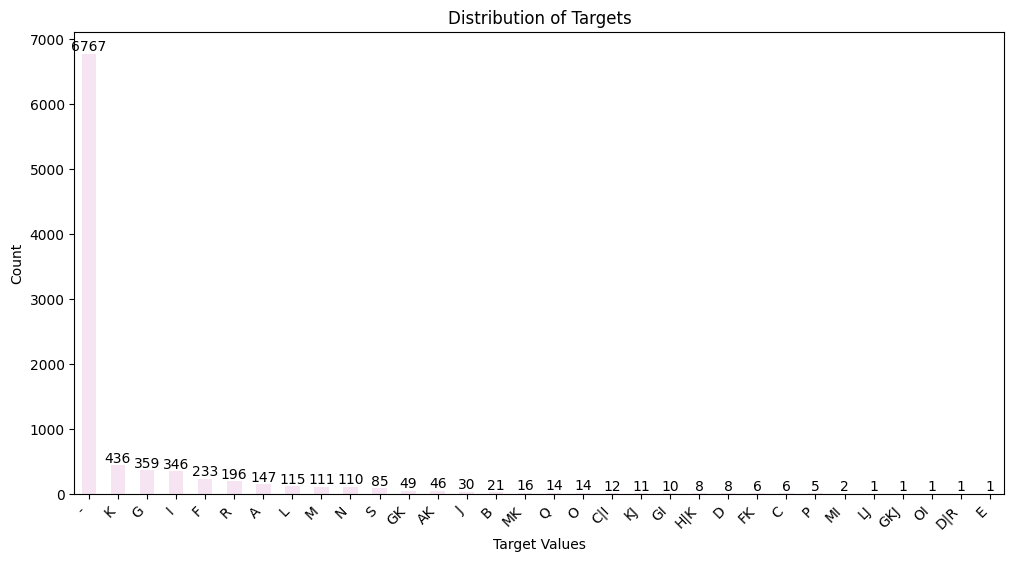

In [16]:
target_counts = df['target'].value_counts()

plt.figure(figsize=(12, 6))
target_counts.plot(kind='bar', color=first_color)
plt.title('Distribution of Targets')
plt.xlabel('Target Values')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')
for index, value in enumerate(target_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

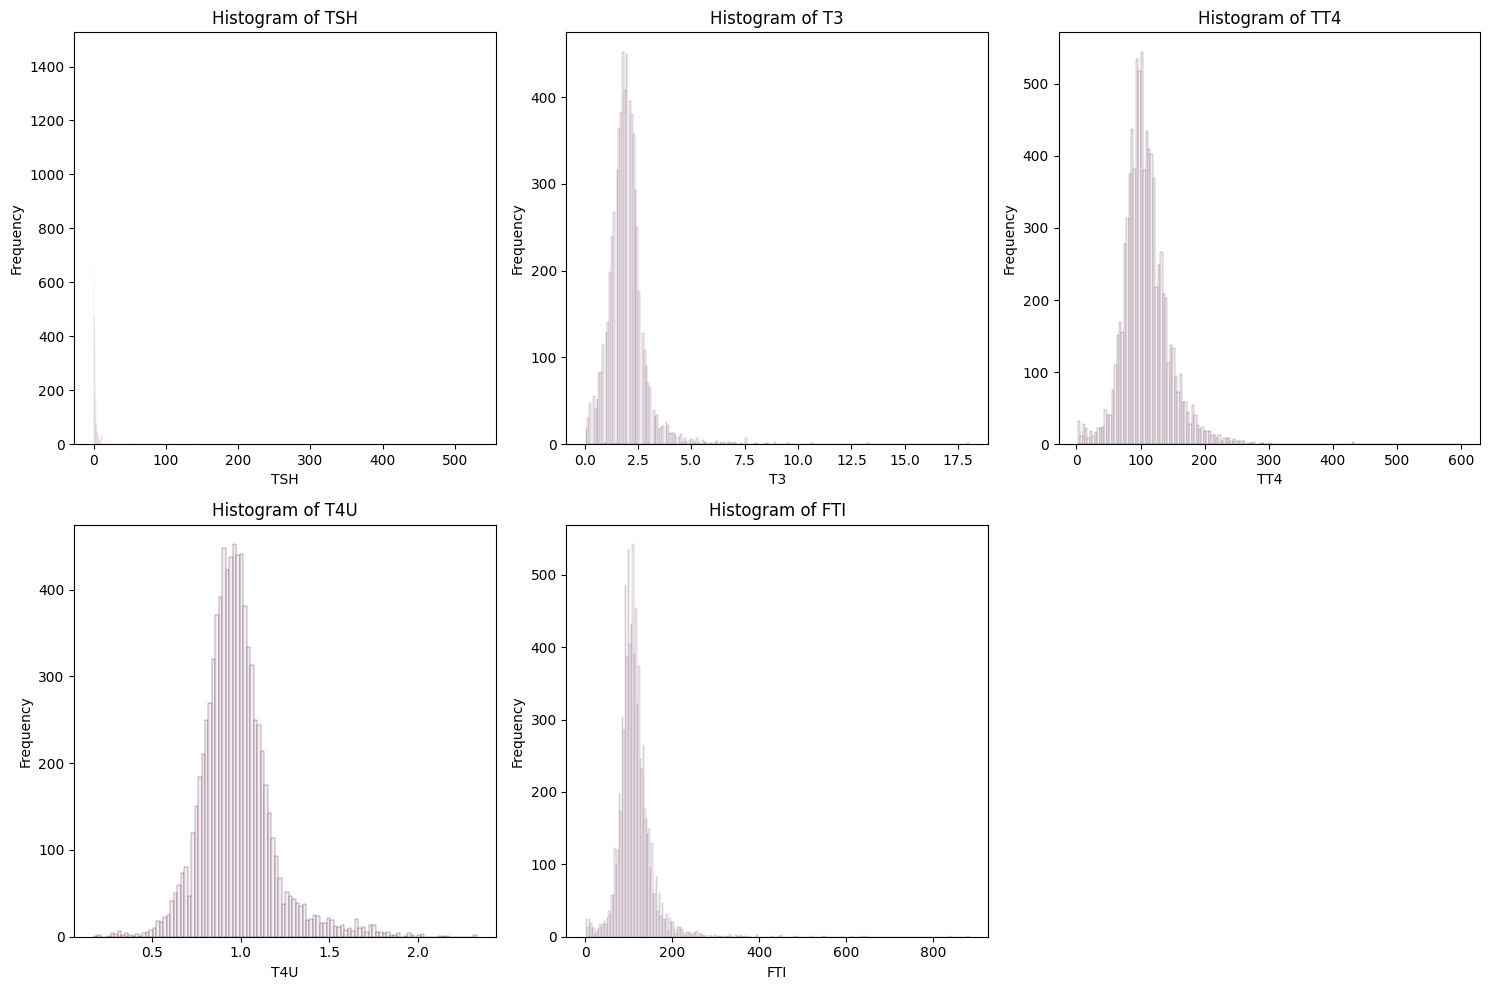

In [17]:
columns_to_plot = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins='auto', color=first_color)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()